In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_stock_prices.csv to cleaned_stock_prices.csv


Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression      0.54   0.617647  0.677419  0.646154
1        Random Forest      0.52   0.606061  0.645161  0.625000


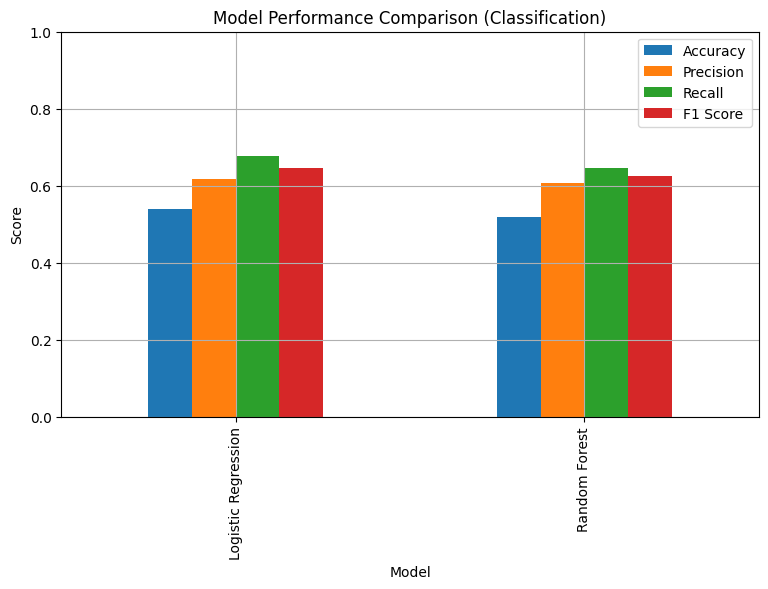


🧩 Reflection:
For this stock price movement prediction project, **F1 Score** is the most important metric.
Since financial data can be imbalanced (more non-movement than movement), F1 balances both Precision and Recall. A high F1 score means the model not only identifies actual upward movements accurately (Recall) but also minimizes false alarms (Precision).

✅ Milestone Achieved: Final evaluation metric decided — F1 Score.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_stock_prices.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
def convert_volume(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip()
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
        elif val == '-':
            return None
        else:
            return float(val)
    return val

df['Vol.'] = df['Vol.'].apply(convert_volume)
df['Daily Range'] = df['High'] - df['Low']
df = df.dropna()
df['Next_Day_Price'] = df['Price'].shift(-1)
df['Price_Up'] = (df['Next_Day_Price'] > df['Price']).astype(int)
df = df[:-1]
X = df[['Open', 'High', 'Low', 'Vol.', 'Daily Range']]
y = df['Price_Up']
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42, shuffle=False
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_acc, rf_acc],
    'Precision': [precision_log, precision_rf],
    'Recall': [recall_log, recall_rf],
    'F1 Score': [f1_log, f1_rf]
})
print("Model Evaluation Results:")
print(results)
results.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(9,5))
plt.title("Model Performance Comparison (Classification)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()
print("\n🧩 Reflection:")
print("For this stock price movement prediction project, **F1 Score** is the most important metric.")
print("Since financial data can be imbalanced (more non-movement than movement), "
      "F1 balances both Precision and Recall. A high F1 score means the model not only "
      "identifies actual upward movements accurately (Recall) but also minimizes false alarms (Precision).")
print("\n✅ Milestone Achieved: Final evaluation metric decided — F1 Score.")